In [1]:
from sympy import *
from IPython.display import display
init_printing(wrap_line=False)
var('x,y')

In [2]:
f = y-3*x+5 
g = x**2+y**2-5
h = y-x**3+3*x**2-3*x+1
display(*[f,g,h])

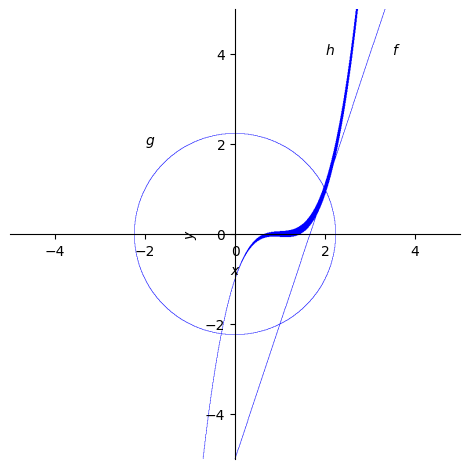

'\nplt1=plot_implicit(f, show=False, aspect_ratio=(1, 1))\nplt2=plot_implicit(g, show=False, aspect_ratio=(1, 1))\nplt3=plot_implicit(h, show=False, aspect_ratio=(1, 1))\nplt3.extend(plt1)\nplt3.extend(plt2)\nplt3.show()\n'

In [3]:
plot_implicit(Or(Eq(f,0),Eq(g,0),Eq(h,0)), aspect_ratio=(1, 1), \
              annotations=[{'xy': (-2, 2), 'text': '$g$'}, {'xy': (2, 4), 'text': '$h$'}, {'xy': (3.5, 4), 'text': '$f$'}] )
#Much better than 
'''
plt1=plot_implicit(f, show=False, aspect_ratio=(1, 1))
plt2=plot_implicit(g, show=False, aspect_ratio=(1, 1))
plt3=plot_implicit(h, show=False, aspect_ratio=(1, 1))
plt3.extend(plt1)
plt3.extend(plt2)
plt3.show()
'''

<font color='red'> <b> GCD isn't showing that root exists b/w polynomials </b></font> 

In [4]:
print(gcd(f,g), gcd(f,h), gcd(g,h))

1 1 1


Roots of tuple pair show there is interception among pairs of polynomials; it doesn't show there is a <b>common interception</b> among x3 polynomials <br> The last x3 element tuple does show common interception among polynomials

In [5]:
display(root(f,g), root(f,h), root(g,h), root(f,g,h))

Representation varies

In [6]:
display(root(g,f), root(h,f), root(h,g), root(h,g,f))

# Sylvester’s Resultant $(n=2 \ m=3)$
By calculating the <b> determinant of Sylvester’s resultant </b> we know that the system has a common root. That is because the determinant is equal to 0 (or can be fully factored). <br> When we have a system of <b> m polynomial equations in two n variables </b> we can solve for one variable where the second one is kept as a coefficient. This actually allow us to find the roots of the system. That is also why the resultant is often refereed to as the eliminator <br> https://nikoleta-v3.github.io/posts/resultant-theory/

In [7]:
from sympy.polys import subresultants_qq_zz
matrix = subresultants_qq_zz.sylvester(f,g, y) #matrix in terms of x, only accepts x2 polynomials
matrix

⎡1  5 - 3⋅x     0   ⎤
⎢                   ⎥
⎢0     1     5 - 3⋅x⎥
⎢                   ⎥
⎢             2     ⎥
⎣1     0     x  - 5 ⎦

factor reveals common root at x=2 & x=1

In [8]:
display(*[matrix.det(), factor(matrix.det()), solve(factor(matrix.det())) ])

Solve for corresponding y for each known x for each polynomial. We have <b>x1 common root (intercepts) </b> $(2,1)$ in all polynomials  

In [9]:
for eq in [f,g,h]:
    display(eq)
    for _x in (1,2): #solved x values
        y=solve(eq.subs(x,_x))
        display((_x, y))

single common intercept of f & g & h

In [10]:
solve((f,g,h), dict=True)

x2 intercepts of f & h (see graph)

In [11]:
solve((f,h), dict=True)

# Dixon Resultant $(n=3 \ m=3)$
By calculating the <b> determinant of Dixon’s resultant </b> we know that the system has a common root. That is because the determinant is equal to 0 (or can be fully factored). <br>When we have a system of <b> m polynomial equations in n variables </b>

In [12]:
from sympy.polys.multivariate_resultants import DixonResultant
var('x,y,z')

In [13]:
f = x ** 2 + y ** 2 - 1 + z * 0
g = x ** 2 + z ** 2 - 1 + y * 0
h = y ** 2 + z ** 2 - 1
display(*[f,g,h])

In [14]:
dixon = DixonResultant([f, g, h], [y, z]) #in terms of x

In [15]:
poly = dixon.get_dixon_polynomial()
poly

In [16]:
matrix = dixon.get_dixon_matrix(poly)
matrix

⎡                                     2⎤
⎢   0         0         0      1 - 2⋅x ⎥
⎢                                      ⎥
⎢                           2          ⎥
⎢   0         0      1 - 2⋅x      0    ⎥
⎢                                      ⎥
⎢                 2                    ⎥
⎢   0      1 - 2⋅x      0         0    ⎥
⎢                                      ⎥
⎢       2                              ⎥
⎣1 - 2⋅x      0         0         0    ⎦

In [17]:
display(*[matrix.det(), factor(matrix.det()), solve(factor(matrix.det())) ])

h is in terms of y, z ...can be solved

In [18]:
for eq in [f,g,h]:
    display(eq)
    for _x in (-sqrt(2)/2, sqrt(2)/2): #solved x values
        y=solve(eq.subs(x,_x))
        display((_x, y))

# Bezout Resultant $(n=1,2 \ m=2,3)$

In [19]:
from sympy.polys import subresultants_qq_zz
var('x');

Common root exists

In [20]:
p = x ** 3 +1
q = x + 1
matrix=subresultants_qq_zz.bezout(p, q, x)
display(matrix, matrix.det()) #determinant is 0

⎡-1  0  1⎤
⎢        ⎥
⎢0   1  1⎥
⎢        ⎥
⎣1   1  0⎦

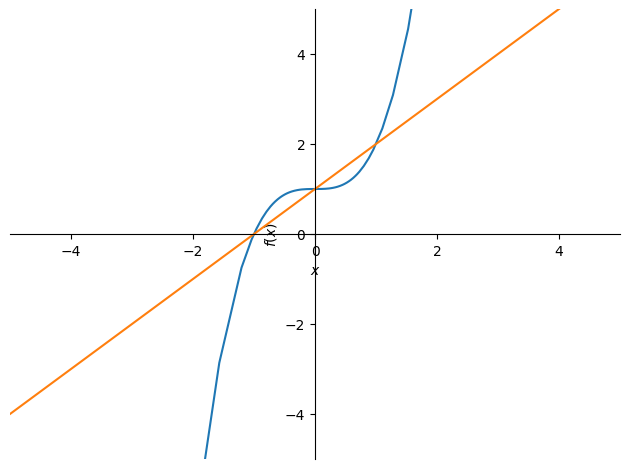

In [21]:
plot(p,q, xlim=[-5,5], ylim=[-5,5])

Although we have x3 intersections but only at $x=-1$ we have common root

In [22]:
solve((p,q), x)

Here we all have intersections, resulting p,q values can be calculated henceforth

In [23]:
solve((p-q),x)

In [24]:
display(factor(p), factor(q)) #common root x=-1

# Important Case
<b> Normal plots contains the points (x,y) where f(x)=y. Implicit plots contains the points (x,y) where f(x,y)=0</b> <br>
<font color='red'> <b> Although we have an common intersection but it doesn't translate into common root </b></font> <br> This intersection at $(2,2)$ is <b>a root [or solution] of f(x)-g(x)=0</b> <br> 
<sub>Thanks to <mark>buster</mark> at https://libera-math.github.io/ for phrasing sentences correctly</sub>

No Common root exists

In [25]:
r = x ** 2 - 7 * x + 12
h = x ** 2 - x
matrix=subresultants_qq_zz.bezout(r, h, x)
display(r, h, matrix, matrix.det()) #determinant is !=0

⎡12   -12⎤
⎢        ⎥
⎣-12   6 ⎦

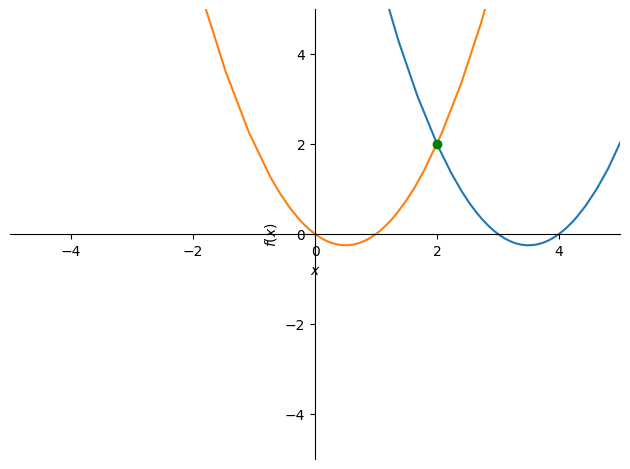

In [26]:
plot(r,h, xlim=[-5,5], ylim=[-5,5], markers=[{'args': [2, 2, 'go']} ])

As expected no common solution

In [27]:
solve((r,h),x)

As mentioned earlier at intersection $r(x)-h(x)=0$

In [28]:
solve((r-h),x)

In [29]:
display(factor(r), factor(h)) #no similar factor

In [30]:
var('x,y');
p = x + y
q = x ** 2 + y ** 3
h = x ** 2 + y
matrix=subresultants_qq_zz.bezout(p, q, y)
display(matrix, matrix.det(), factor(matrix.det())) #determinant factors show x=0 & x=1

⎡ 2        ⎤
⎢x   0   -x⎥
⎢          ⎥
⎢0   -x  -1⎥
⎢          ⎥
⎣-x  -1  0 ⎦

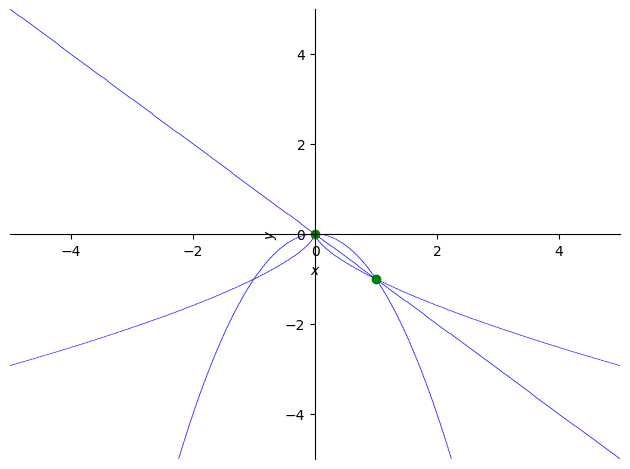

In [31]:
plot_implicit(Or(Eq(p,0), Eq(q,0), Eq(h,0)), \
             markers=[{'args': [0, 0, 'go']}, {'args': [1, -1, 'go']} ])

Two intersections $(0,0) \ (1,-1)$

In [32]:
for eq in [p,q,h]:
    display(eq)
    for _x in (0,1): #solved x values
        y=solve(eq.subs(x,_x))
        display((_x, y))

In [33]:
%reload_ext version_information
%version_information sympy

Software versions
Python 3.9.13 64bit [Clang 12.0.9 (https://android.googlesource.com/toolchain/llvm-project c935d99d]
IPython 8.4.0
OS Linux 4.19.113 24856341 aarch64 with libc
sympy 1.11.1
Tue Oct 18 03:23:43 2022 PKT